Ref: https://www.joinquant.com/post/7922

本节以 鲍鱼数据集 为例。此数据集记录了鲍鱼的长度，宽度，重量等指标，最后一列数据就是“环数”（即年龄，和树的年轮类似）。

这是一个基于因素变量的实数值预测，属于回归问题。

In [10]:
#!wget https://archive.ics.uci.edu/ml/machine-learning-databases/abalone/abalone.data
import matplotlib.pyplot as plt
plt.rcParams['font.sans-serif']=['SimHei'] #用来正常显示中文标签
plt.rcParams['axes.unicode_minus']=False #用来正常显示负号

import numpy as np

In [2]:
import pandas as pd

target_url = 
"https://archive.ics.uci.edu/ml/machine-learning-databases/abalone/abalone.data"
df = pd.read_csv(target_url, header=None, prefix='V')
df.columns = ['性别','长度','直径','高度','整体重量', '去壳重量', 
              '脏器重量', '壳的重量', '环数']

print ("数据集规模：",df.shape)

print ("\n数据集数据类型：\n",df.get_dtype_counts())

print ('\n数据集头5条数据：\n',df.head())

print ('\n数据集描述：\n', df.describe())

数据集规模： (4177, 9)

数据集数据类型：
 float64    7
int64      1
object     1
dtype: int64

数据集头5条数据：
   性别     长度     直径     高度    整体重量    去壳重量    脏器重量   壳的重量  环数
0  M  0.455  0.365  0.095  0.5140  0.2245  0.1010  0.150  15
1  M  0.350  0.265  0.090  0.2255  0.0995  0.0485  0.070   7
2  F  0.530  0.420  0.135  0.6770  0.2565  0.1415  0.210   9
3  M  0.440  0.365  0.125  0.5160  0.2155  0.1140  0.155  10
4  I  0.330  0.255  0.080  0.2050  0.0895  0.0395  0.055   7

数据集描述：
                 长度           直径           高度         整体重量         去壳重量  \
count  4177.000000  4177.000000  4177.000000  4177.000000  4177.000000   
mean      0.523992     0.407881     0.139516     0.828742     0.359367   
std       0.120093     0.099240     0.041827     0.490389     0.221963   
min       0.075000     0.055000     0.000000     0.002000     0.001000   
25%       0.450000     0.350000     0.115000     0.441500     0.186000   
50%       0.545000     0.425000     0.140000     0.799500     0.336000   
75%       0.615

## 绘制箱线图
箱线图也是一种识别异常点的强大工具：
- 中位数：中间红线；
- 25%分位数：箱顶；
- 75%分位数：箱底；
- 上边缘水平线： 到箱顶的距离是箱高的1.4倍（默认参数）, 即4分位间距的1.4倍
- 下边缘水平线： 到箱底的距离是箱高的1.4倍（默认参数）, 即4分位间距的1.4倍
- 异常值： 上下边缘以外的数据。

下面第一张图由于年轮数远大于其他指标，看不清楚，剔除年龄数于是有第二张图。
第二张图进行标准化于是有第三张图。

注意：书中将normalization翻译成"归一化"似乎不合理，应该翻译成标准化。

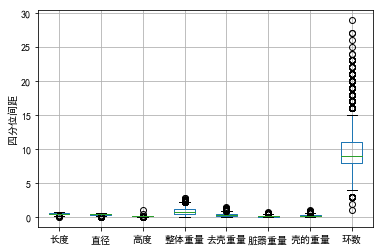

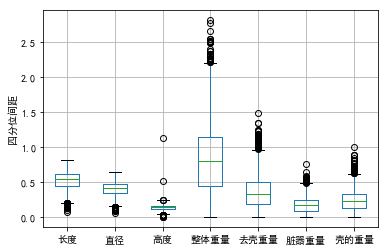

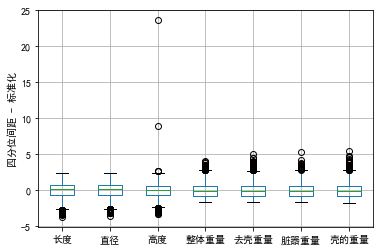

In [3]:
import matplotlib.pyplot as plt

df.iloc[:,range(1,9)].boxplot()
plt.ylabel("四分位间距")
plt.show()

_df = df.iloc[:,range(1,8)]
_df.boxplot()
plt.ylabel("四分位间距")
plt.show()

((_df - _df.mean()) / _df.std()).boxplot()
plt.ylabel("四分位间距 - 标准化")
plt.show()

## 回归问题的平行坐标图
注意：分类问题只要标志两种颜色，但回归问题需要将标签实数值压缩到[0,1]区间，方便将实数映射到颜色值。

第一张图采用线性映射到[0,1]区间，颜色区分度不高，于是有第二张图。

第二张图先对标签值进行标准化，然后使用分对数变换(1/(1+exp(-x))), 映射到(0,1)区间，颜色区分度大为改善。

分对数函数将很大的负数映射成0，很大的正数映射成1，0映射成0.5


可视化结果发现，属性值相近的地方，折线的颜色也很接近。这可以暗示可以构建相当准确的预测模型。



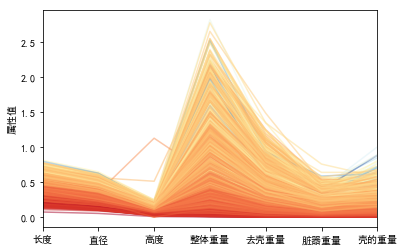

In [4]:
_lim = (df.shape[1]-1)
xs = df.iloc[:,_lim]*1.0
_xs = (xs-xs.min())/(xs.max()-xs.min())
# 这里把环的数量线性变换到0到1

for i in range(df.shape[0]):    
    df.iloc[i,1:_lim].plot(color=plt.cm.RdYlBu(_xs[i]),alpha=0.5)
plt.ylabel("属性值")
plt.show()



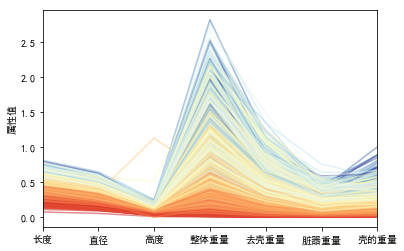

In [11]:
_xs = (xs-xs.mean())/xs.std()
# 通过减掉平均值, 使得_xs能够较为均匀的分布在0的左右
# 再除以标准差, 确保具体的数字能够不要分散的太大
_xs = 1.0/(1.0+np.exp(-_xs))
# 然后, 对加工过的数据取分数对数变换

for i in range(df.shape[0]):    
    df.iloc[i,1:_lim].plot(color=plt.cm.RdYlBu(_xs[i]),alpha=0.5)
plt.ylabel("属性值")
plt.show()

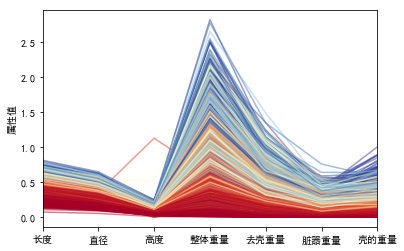

In [12]:
# 如果不除以标准差, 最后的数字会分散的比较大, 颜色对比更加强烈,
# 但是太浓重的颜色就把透明效果给抵消了
_xs = xs-xs.mean()
_xs = 1.0/(1.0+np.exp(-_xs))

for i in range(df.shape[0]):    
    df.iloc[i,1:_lim].plot(color=plt.cm.RdYlBu(_xs[i]),alpha=0.5)
plt.ylabel("属性值")
plt.show()

## 鲍鱼问题属性的相关性可视化
颜色越红表示相关度越高,越接近蓝色相关度越低。

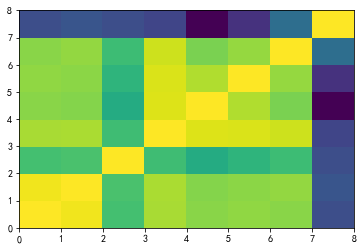

In [15]:
plt.pcolor(df.iloc[:,range(1,df.shape[1])].corr())
plt.show()